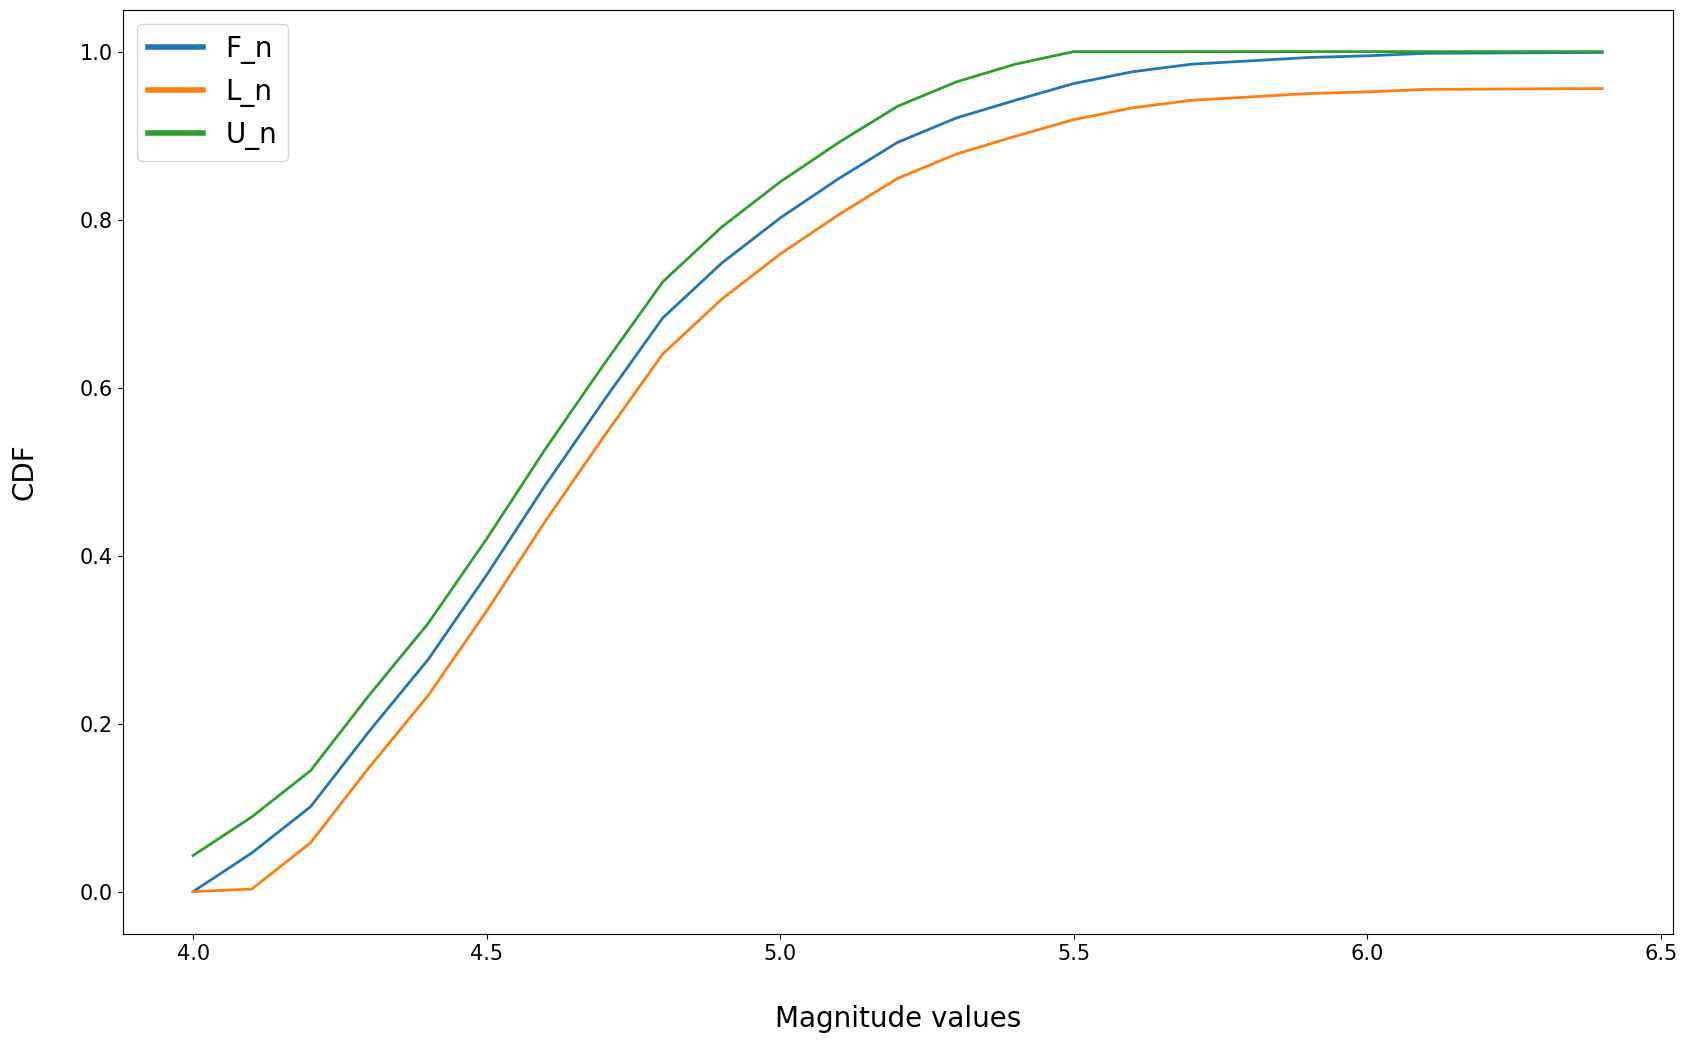

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('fijiquakes.csv')
mag = np.sort(data['mag'].to_numpy())

alpha = 0.05
n = len(mag)

epsilon = np.sqrt( 1/(2*n) * np.log(2/alpha) )
F_n = lambda x: np.sum(mag < x, axis=1) / n
L_n = lambda x: np.maximum(F_n(x) - epsilon, 0)
U_n = lambda x: np.minimum(F_n(x) + epsilon, 1)

x = np.resize(mag, (n, n)).T

legends = [
    'F_n',
    'L_n',
    'U_n'
]
font_size = 20
label_pad = 30

plt.figure(figsize=(20, 12))

plt.plot(mag, F_n(x), linewidth=2)
plt.plot(mag, L_n(x), linewidth=2)
plt.plot(mag, U_n(x), linewidth=2)

legs = plt.legend(legends, fontsize=font_size)
for line in legs.get_lines():
    line.set_linewidth(4)

plt.xticks(fontsize=0.75*font_size)
plt.yticks(fontsize=0.75*font_size)

plt.xlabel('Magnitude values', fontsize=font_size, labelpad=label_pad)
plt.ylabel('CDF', fontsize=font_size, labelpad=label_pad)

plt.show()

In [27]:
from scipy.stats import norm

y_1 = np.full((1, n), 4.9)
y_2 = np.full((1, n), 4.3)
theta_hat = F_n(y_1)[0] - F_n(y_2)[0]
print(theta_hat)

z_95 = norm.ppf(0.975)
L = theta_hat - z_95 * np.sqrt(theta_hat * (1-theta_hat)/n)
U = theta_hat + z_95 * np.sqrt(theta_hat * (1-theta_hat)/n)

print(L, U)

0.5569999999999999
0.526212278332668 0.5877877216673318
